In [21]:
# These are the libraries that we will use in this task
# You can install them using the following command:
# pip install clean-text
# pip install pandas
import re
import pandas as pd
from cleantext import clean 
import cleantext

data = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'
df = pd.read_csv(data) # Read the data into a DataFrame

# A subset of the DataFrame containing the rows from 100 to 200
subset_df = df.loc[100:200] 



def cleaner_text(df):
    # Regular expressions to match different types of URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.com')
    # Regular expressions to match the date format
    date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6})|'            # YYYY-MM-DD HH:MM:SS.MMMMMM
                          r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})|'                      # YYYY-MM-DD HH:MM:SS
                          r'(\d{4}-\d{2}-\d{2})|'                                        # YYYY-MM-DD
                          r'((january|february|march|april|june|july|august|september|'  # <Month> DD YYYY
                          r'october|november|december) \d{2}, \d{4})', re.IGNORECASE)    # Ignore capitalization
    number_pattern = re.compile(r'(\d+(?:,\d{3})*(?:\.\d+)?)')
    for col in df.columns: # Loop over all columns in the DataFrame
        if df[col].dtype == 'O': # Check if the column is a string (i.e., object or string dtype)
            df[col] = df[col].str.replace(r'\s+', ' ', regex=True) # Remove multiple whitespaces, tabs, and newlines
            df[col] = df[col].str.replace(url_pattern, '<URL>')    # Replace URLs with <URL>
            df[col] = df[col].str.replace(date_pattern, '<DATE>')  # Replace dates with <DATE>
            df[col] = df[col].str.replace(number_pattern, '<NUM>') # Replace numbers with <NUMBER>
            df[col] = df[col].apply(cleantext.clean)               # Clean the text using the clean function
    return df # Return the cleaned DataFrame

cleaner_text(subset_df) # Clean the text in the subset of the DataFrame


C:\Users\rosin\AppData\Local\Temp\ipykernel_2728\823597656.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\s+', ' ', regex=True) # Remove multiple whitespaces, tabs, and newlines
C:\Users\rosin\AppData\Local\Temp\ipykernel_2728\823597656.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(url_pattern, '<URL>')    # Replace URLs with <URL>
C:\Users\rosin\AppData\Local\Temp\ipykernel_2728\823597656.py:32: SettingWithCopyWarning: 
A value is 

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
100,100,17247,<url>,fake,<url>,greenmedinfo - action item link % of readers t...,<date>,<date>,<date>,greenmedinfo - action item link,downsize dc,NaN,[''],nan,nan,NaN
101,101,17495,<url>,fake,<url>,<num> most annoying twitter auto dms headline:...,<date>,<date>,<date>,<num> most annoying twitter auto dms,morgan linton,NaN,[''],nan,nan,NaN
102,102,17497,<url>,fake,<url>,<num> articles founders can read to understand...,<date>,<date>,<date>,<num> articles founders can read to understand...,morgan linton,NaN,[''],nan,nan,NaN
103,103,17604,<url>,nan,<url>,posted on by willyloman by scott creighton upd...,<date>,<date>,<date>,american everyman,nan,NaN,[''],posts about steven crowder written by willyloman,nan,NaN
104,104,17798,<url>,fake,<url>,buyer of <url> for $<num>million charged with ...,<date>,<date>,<date>,buyer of <url> for $<num>million charged with ...,morgan linton,NaN,[''],nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,30562,<url>,bias,<url>,howard kurtz is the media critic for fox news....,<date>,<date>,<date>,"media critic: ""the press is falling into the p...",mike lachance,NaN,[''],nan,"news, donald trump, media, media bias, politics",NaN
197,197,31019,<url>,fake,<url>,is there something else going-on many of us ha...,<date>,<date>,<date>,cancer patient slapped with $<num> deductible ...,shahzaib elahi,NaN,[''],nan,nan,NaN
198,198,31398,<url>,fake,<url>,the <num> unseen blessings of being mindful % ...,<date>,<date>,<date>,the <num> unseen blessings of being mindful,nan,NaN,[''],nan,nan,NaN
199,199,32950,<url>,conspiracy,<url>,if you are anything like me you are very inter...,<date>,<date>,<date>,macabre museums: for those with an interest in...,gerald sinclair,NaN,[''],nan,"dying, medicine, mutter, skeletons, strange, u...",NaN


0 141 <url> unreli <url> sometim power christma will make do wild wonder things. do not need believ holi believ posit power do good others. simpl act give without receiv lost mani us these days, worri about money success hold us back from give other who need. one congreg ohio wa move action by power sermon given at their church christma pastor at grand lake unit church ohio gave an emot sermon about import understand messag jesus. mani religi peopl messag jesu help other befor yourself, make sure peopl who suffer get help they need enjoy life littl bit. sermon wa realli about generos what can look like our lives. jesu live long time ago he act fashion hi time - but what would gener act look like our wa focu sermon wa not lost who were so move they had take after sermon congreg decid take an offering. bowl wa pass around room everyon what they could christma eve word sermon still ring their ears. what did they do member congreg drove down local waffl hous visit ladi work night shift. wh

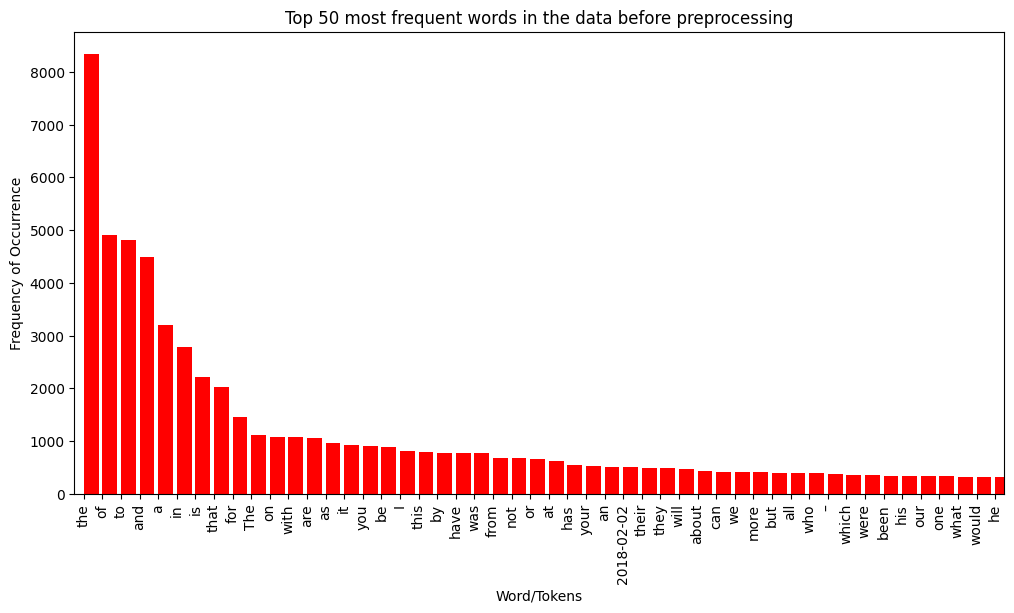

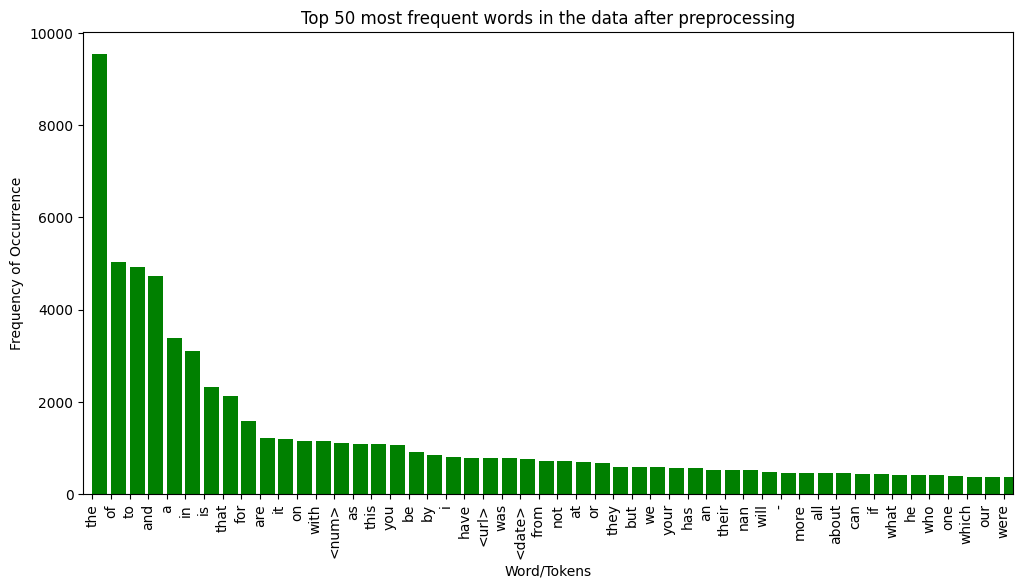

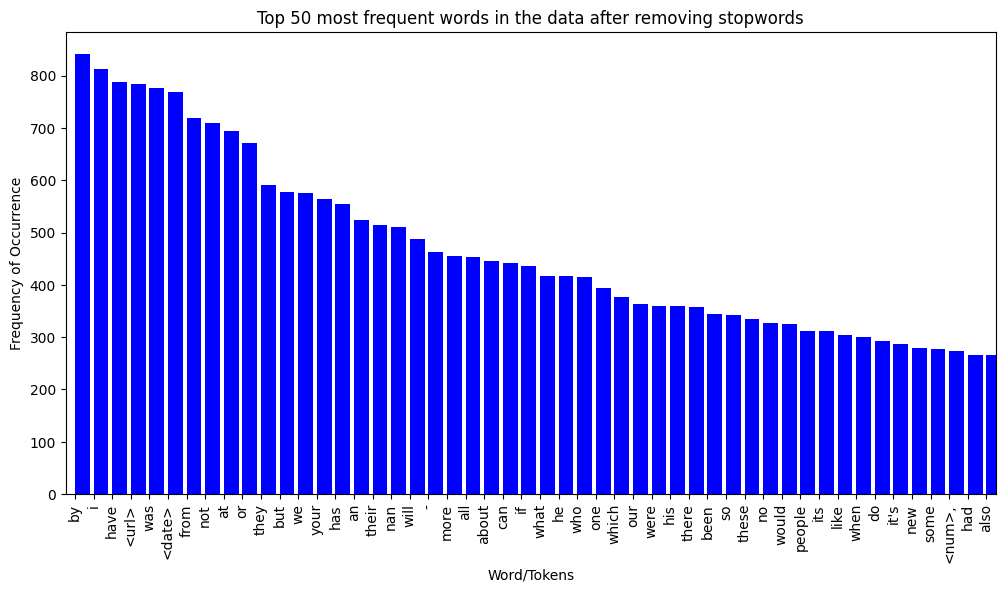

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

preData = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'
preDf = pd.read_csv(data) # Read the unprocessed data into a DataFrame
postDf = cleaner_text(df) # Read the processed data into a DataFrame

# A function to get the number of words and the words themselves in each column of a DataFrame
# The function takes two arguments: the DataFrame and an option
# The option can be either 'ints' or 'words' if we want the number of words or the words themselves
def word_info(df, opt):
    text_series = pd.concat([df[col] for col in df.columns], ignore_index=True) # concatenate all the text columns into a single series
    if opt == 'ints':
        words_int = text_series.str.split().explode().nunique() # count the number of unique words
        return words_int
    elif opt == 'words':
        words = text_series.str.split().explode() # split the text into a series of words
        return words

# Count the frequency of each word and 
def wordSignificance(word):
    word_counts = word.value_counts() # Count the frequency of each word
    # Calculate the significance of each word
    # By dividing the frequency of each word by the total number of words
    word_counts = word_counts / len(word)
    return word_counts

# A function to get the top n% stopwords 
def topStopwords(wordSignificance, n):
    # Get the words that occur more than n% of the time
    stopword = wordSignificance[wordSignificance > n]
    stopword_list = stopword.index.tolist() # Convert the index to a list
    return stopword_list # Return the list of stopwords
topstopword_list = topStopwords(wordSignificance(word_info(postDf, 'words')),0.005)

# A function to get the bottom n% stopwords
def botStopwords(wordSignificance, n):
    # Get the words that occur more than n% of the time
    stopword = wordSignificance[wordSignificance < n]
    stopword_list = stopword.index.tolist() # Convert the index to a list
    return stopword_list # Return the list of stopwords
botstopword_list = botStopwords(wordSignificance(word_info(postDf, 'words')),0.00001)

# A function to remove stopwords from our dataframe
def removeStopwords(stopwords, df):
    df_WIP = df.copy() # Make a copy of the DataFrame for use in this function
    for col in df_WIP.columns: # Loop over all columns in the DataFrame
        # If any of the stopwords are in the text, replace them with an empty string
        if df_WIP[col].dtype == 'O': # Check if the column is a string (i.e., object or string dtype)
            # remove stopwords from the text in each column of the DataFrame using the apply function and lambda expression
            df_WIP[col] = df_WIP[col].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    return df_WIP
nostopword_df = removeStopwords(topstopword_list + botstopword_list, postDf) # Read the data without stopwords into a DataFrame

nostopword_list = list(nostopword_df.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1).values)

ps = PorterStemmer()

for text in nostopword_list:
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    print(" ".join(stemmed_words))



# A function to plot the top 50 most frequent words
def plot(words, title, colors, max_words):
    # count the frequency of each word
    word_counts = words.value_counts()

    # sort the list of words by frequency
    word_counts = word_counts.sort_values(ascending=False)

    # plot a bar chart of the 50 most frequent words
    top_words = word_counts[:max_words] # get the top 50 words
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(top_words.index, top_words.values, color=colors, width=0.8, align='edge') 
    ax.set_xticks(range(len(top_words))) # set the x-ticks to the word positions
    ax.set_xticklabels(top_words.index, rotation=90)
    ax.set_xlabel('Word/Tokens')
    ax.set_ylabel('Frequency of Occurrence')
    ax.set_xlim(-0.5, len(top_words) - 0.5) # add a gap at the beginning and end
    plt.title(title)
    plt.show()
### DF info ###
print('\n### Unique words in the data before and after preprocessing ###\n')
print('Unique words before preprocessing: ', word_info(preDf, 'ints')) # 31808
print('Unique words after preprocessing: ', word_info(postDf, 'ints')) # 26628
print('Unique words after removing stopwords: ', word_info(nostopword_df, 'ints')) 
print('')
print('Reduction in size of vocabulary: ', (word_info(postDf, 'ints')) - (word_info(nostopword_df, 'ints')))
print('Reduction %: ', round(((word_info(postDf, 'ints')) - (word_info(nostopword_df, 'ints')))/word_info(postDf, 'ints')*100, 5), '%')
print('')

### Plots ###
plot(word_info(preDf, 'words'), 'Top 50 most frequent words in the data before preprocessing', 'red', 50)
plot(word_info(postDf, 'words'), 'Top 50 most frequent words in the data after preprocessing', 'green', 50)
plot(word_info(nostopword_df, 'words'), 'Top 50 most frequent words in the data after removing stopwords', 'blue', 50)